In [31]:
import pickle
from pathlib import Path
import matplotlib.pyplot as plt

In [32]:
river_result = pickle.load(open("../../output/test_kendall_0623.pkl", "rb"))
ni_result = pickle.load(open("../../output/xla_random_results0.6167.pkl", "rb"))

In [33]:
river_result = {Path(k).stem:v for k,v in zip(river_result.file.values, river_result.preds.values)}

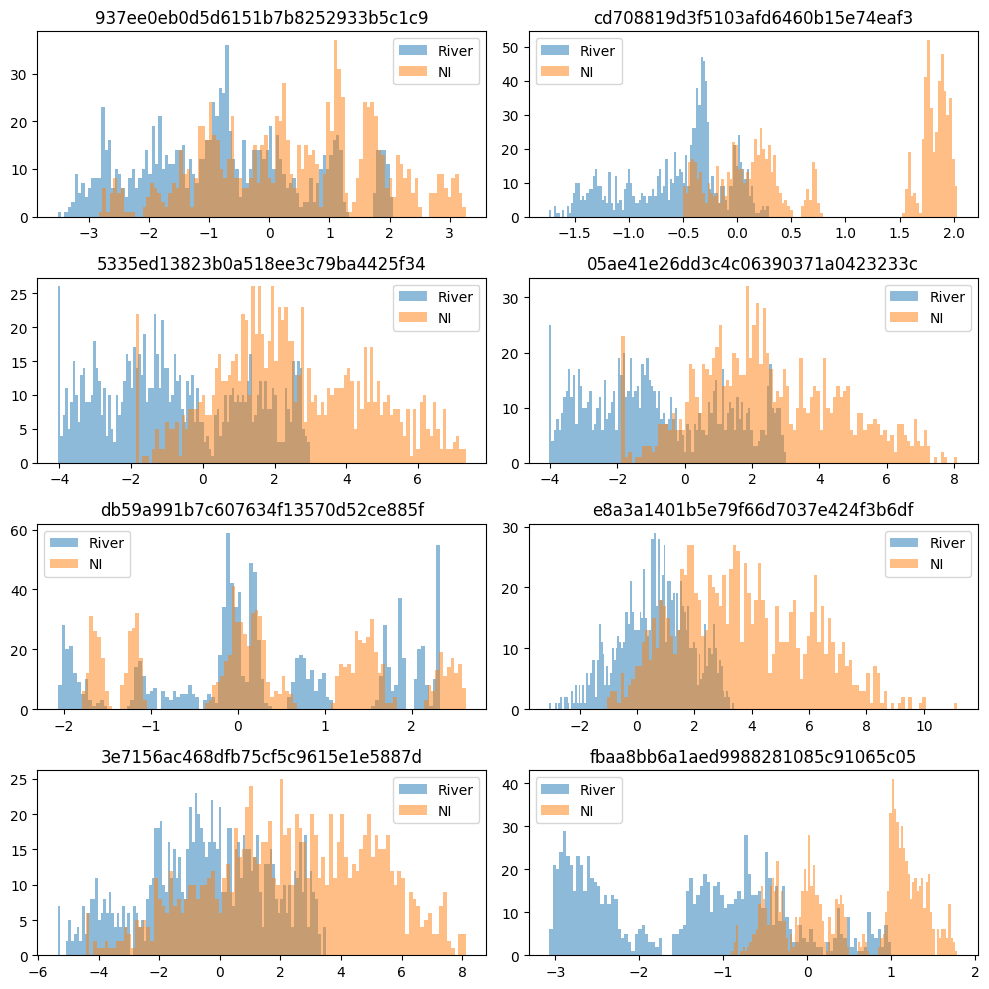

In [34]:
axes = plt.subplots(4, 2, figsize=(10,10))[1].flatten()

for i, (model_id, r_preds) in enumerate(river_result.items()):
    n_preds = ni_result[model_id]
    
    axes[i].hist(r_preds, bins=100, alpha=0.5, label="River")
    axes[i].hist(n_preds, bins=100, alpha=0.5, label="NI")
    axes[i].set_title(model_id)
    axes[i].legend()
plt.tight_layout()

In [35]:
standard_river_result = {}
standard_ni_result = {}

for i, (model_id, r_preds) in enumerate(river_result.items()):
    n_preds = ni_result[model_id]
    
    standard_river_result[model_id] = (r_preds - r_preds.mean()) / r_preds.std()
    standard_ni_result[model_id] = (n_preds - n_preds.mean()) / n_preds.std()

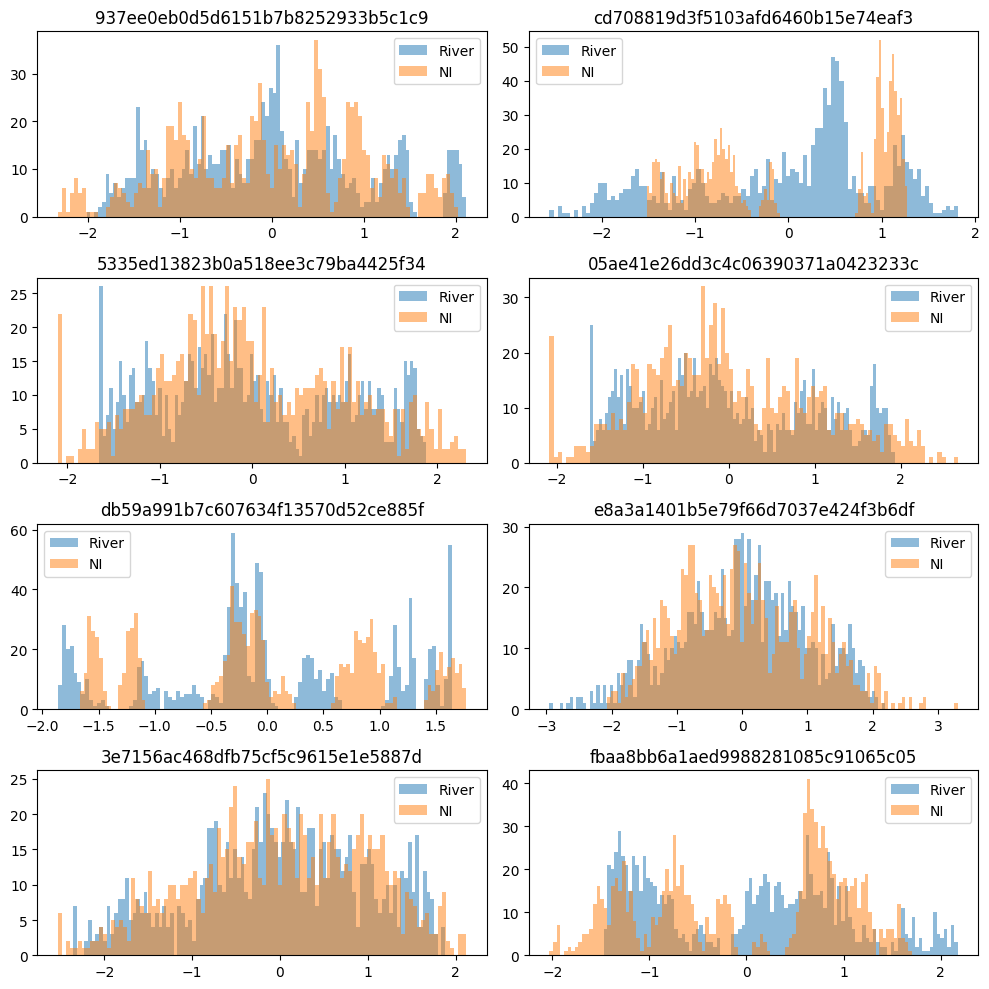

In [36]:
axes = plt.subplots(4, 2, figsize=(10,10))[1].flatten()

for i, (model_id, r_preds) in enumerate(standard_river_result.items()):
    n_preds = standard_ni_result[model_id]
    
    axes[i].hist(r_preds, bins=100, alpha=0.5, label="River")
    axes[i].hist(n_preds, bins=100, alpha=0.5, label="NI")
    axes[i].set_title(model_id)
    axes[i].legend()
plt.tight_layout()

In [44]:
merged_result = {}

for model_id in river_result.keys():
    merged = (standard_river_result[model_id] + standard_ni_result[model_id]) / 2
    merged_result[model_id] = merged.argsort().tolist()
    


In [48]:
river_result_arg = {k: v.argsort().tolist() for k,v in river_result.items()}

In [51]:
SOURCE = "xla"
SEARCH = "random"


with open(f"../../output/{SOURCE}_{SEARCH}_river.csv", "w") as f:
    f.write("ID,TopConfigs\n")
    for k, v in river_result_arg.items():
        model_id = f"layout:{SOURCE}:{SEARCH}:"+k
        values = ";".join([str(i) for i in v])
        f.write(f"{model_id},{values}\n")
